In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.utils import to_categorical

In [7]:
def get_data():
    data = pd.read_csv("fer2013.csv", index_col=False)
    X = [[int(a) for a in i.split()] for i in data['pixels']]
    Y = data['emotion']
    X, Y = np.array(X) / 255.0, np.array(Y)
    training_len = int(len(X) * 0.8)
    X, Y = shuffle(X, Y)
    Xtrain, Ytrain = X[:training_len], Y[:training_len]
    Xvalid, Yvalid = X[training_len:], Y[training_len:]
    X0, Y0 = Xtrain[Ytrain!=1, :], Ytrain[Ytrain!=1]
    X1 = Xtrain[Ytrain==1, :]
    X1 = np.repeat(X1, 9, axis=0)
    Xtrain = np.vstack([X0, X1])
    Ytrain = np.concatenate((Y0, [1]*len(X1)))
    Xtrain = Xtrain.reshape(-1, 48,48, 1)
    Xvalid = Xvalid.reshape(-1, 48,48, 1)
    
    return Xtrain, to_categorical(Ytrain, 7), Xvalid, to_categorical(Yvalid, 7)

In [8]:
Xtrain, Ytrain, Xvalid, Yvalid = get_data()

In [19]:
def show_img(Xtrain, label=23):
    y_label = ['Angery', 'Disgust', 'Fear', 'Happy', 'Sad', 'Suprise', 'Neutral']
    img = Xtrain[label-1:label,:].reshape(48, 48)
    print(img.shape)
    print(y_label[np.argmax(Ytrain[label-1:label])])
    return img

(48, 48)
Fear


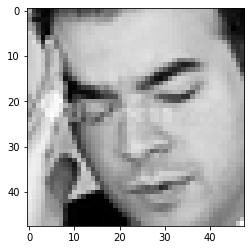

In [20]:
plt.imshow(show_img(Xtrain), cmap='gray')

In [21]:
Xtrain.shape

(28709, 48, 48, 1)

In [23]:
all_stuff = [np.argmax(Ytrain[i]) for i in range(0,len(Ytrain))]

In [28]:
for i in list(set(all_stuff)):
    print(i, 7211/all_stuff.count(i))

0 1.821419550391513
1 16.653579676674365
2 1.7502427184466018
3 1.0
4 1.5032311861580154
5 2.2506242197253434
6 1.4465396188565698
